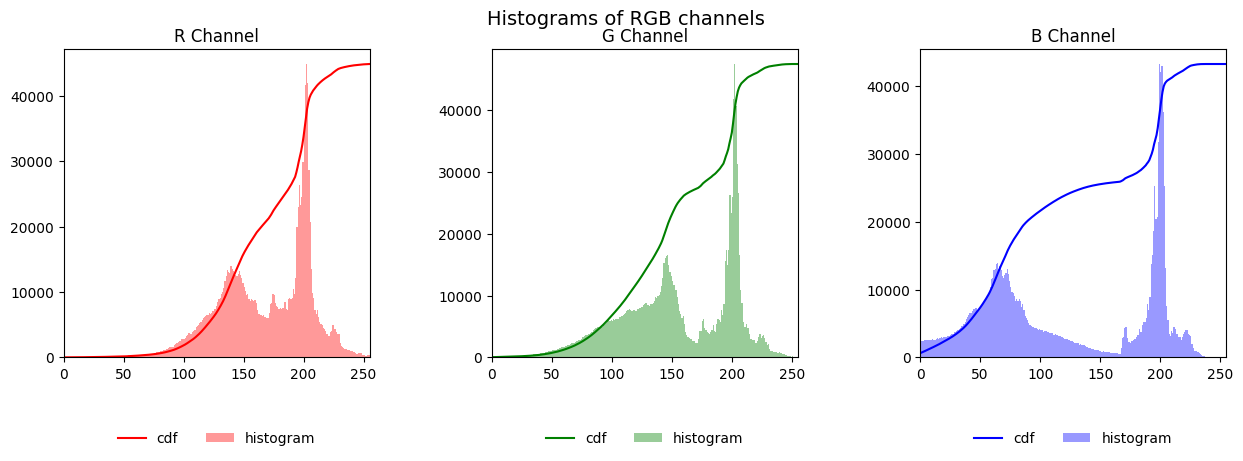

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from skimage import io
import cv2 as cv

# завантаження зображення
img = cv.imread('/content/cat.bmp')
img = cv.cvtColor(img, cv.COLOR_RGB2BGR)

# створення вікна з графіками
fig, axs = plt.subplots(1, 3, figsize=(15, 4))

# побудова гістограм для кожного каналу
for i, c in enumerate('rgb'):
    hist,bins = np.histogram(img[..., i].flatten(), 256,[0,256])
    cdf = hist.cumsum()
    cdf_normalized = cdf * float(hist.max()) / cdf.max()
    axs[i].plot(cdf_normalized, color =c)
    axs[i].hist(img[..., i].flatten(),256,[0,256], color =c, alpha=0.4)
    axs[i].set_xlim([0, 255])
    axs[i].set_title(f"{c.upper()} Channel", fontsize=12)
    axs[i].legend(('cdf','histogram'), loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=2)

    # задання розмірів легенди
    leg = axs[i].get_legend()
    leg.get_frame().set_linewidth(0.0)


# встановлення заголовку графіків
fig.suptitle("Histograms of RGB channels", fontsize=14)

# додавання простору між графіками
fig.subplots_adjust(wspace=0.4)

# відображення вікна з графіками
plt.show()


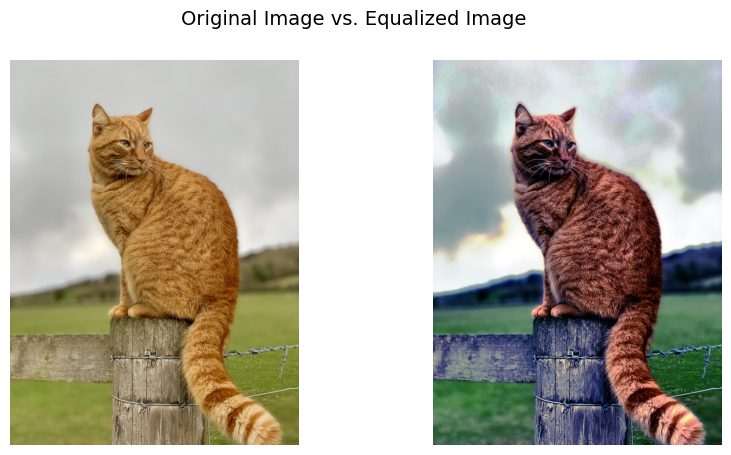

In [ ]:
equalized_img_cv = np.empty(shape=img.shape)
for c in range(3):
    equalized_img_cv[..., c] = cv.equalizeHist(img[..., c])
equalized_img_cv = np.array(equalized_img_cv, dtype='int32')

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(img)
ax[0].axis('off')
ax[1].imshow(equalized_img_cv)
ax[1].axis('off')

fig.suptitle("Original Image vs. Equalized Image", fontsize=14)

plt.show()


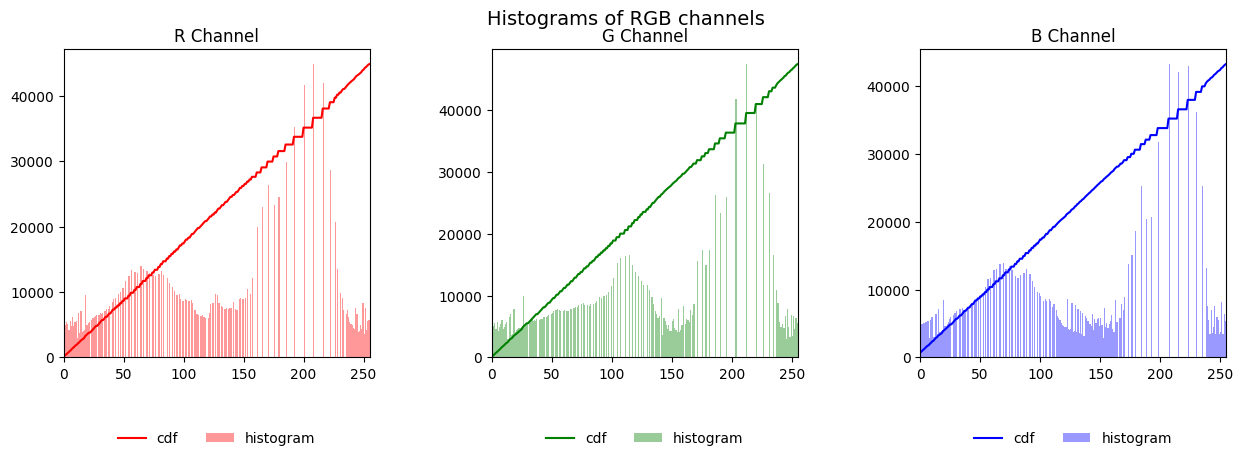

In [ ]:
# створення вікна з графіками
fig, axs = plt.subplots(1, 3, figsize=(15, 4))
# побудова гістограм для кожного каналу
for i, c in enumerate('rgb'):
    hist,bins = np.histogram(equalized_img_cv[..., i].flatten(), 256,[0,256])
    cdf = hist.cumsum()
    cdf_normalized = cdf * float(hist.max()) / cdf.max()
    axs[i].plot(cdf_normalized, color =c)
    axs[i].hist(equalized_img_cv[..., i].flatten(),256,[0,256], color =c, alpha=0.4)
    axs[i].set_xlim([0, 255])
    axs[i].set_title(f"{c.upper()} Channel", fontsize=12)
    axs[i].legend(('cdf','histogram'), loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=2)

    # задання розмірів легенди
    leg = axs[i].get_legend()
    leg.get_frame().set_linewidth(0.0)


# встановлення заголовку графіків
fig.suptitle("Histograms of RGB channels", fontsize=14)

# додавання простору між графіками
fig.subplots_adjust(wspace=0.4)

# відображення вікна з графіками
plt.show()

In [ ]:
def apply_filter(img, kernel):
    filtered = cv.filter2D(img, -1, np.array(kernel))
    return filtered

In [ ]:
filters = {
    'roberts_x': [[0, -1],
                 [1, 0]],
    'roberts_y': [[-1, 0],
                 [0, 1]],
    'prewitt_x': [[1, 0, -1],
                 [1, 0, -1],
                 [1, 0, -1]],
    'prewitt_y': [[-1, -1, -1],
                 [0, 0, 0],
                 [1, 1, 1]],
    'sobel_x': [[1, 0, -1],
               [2, 0, -2],
               [1, 0, -1]],
    'sobel_y': [[-1, -2, -1],
               [0, 0, 0],
               [1, 2, 1]],
}

In [ ]:
def plot_images(images, titles):
    fig, ax = plt.subplots(2, len(images), figsize=(6 * len(images), 12))
    for i in range(len(images)):
        ax[0][i].imshow(images[i][0], cmap='gray')
        ax[0][i].set_title(titles[i])
        ax[0][i].axis('off')
        ax[1][i].imshow(images[i][1], cmap='gray')
        ax[1][i].set_title(titles[i] + ' on equalized image')
        ax[1][i].axis('off')

In [ ]:

img_gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY)
equalized_img_cv_gray = cv.convertScaleAbs(equalized_img_cv)
equalized_img_cv_gray = cv.cvtColor(equalized_img_cv_gray, cv.COLOR_RGB2GRAY)

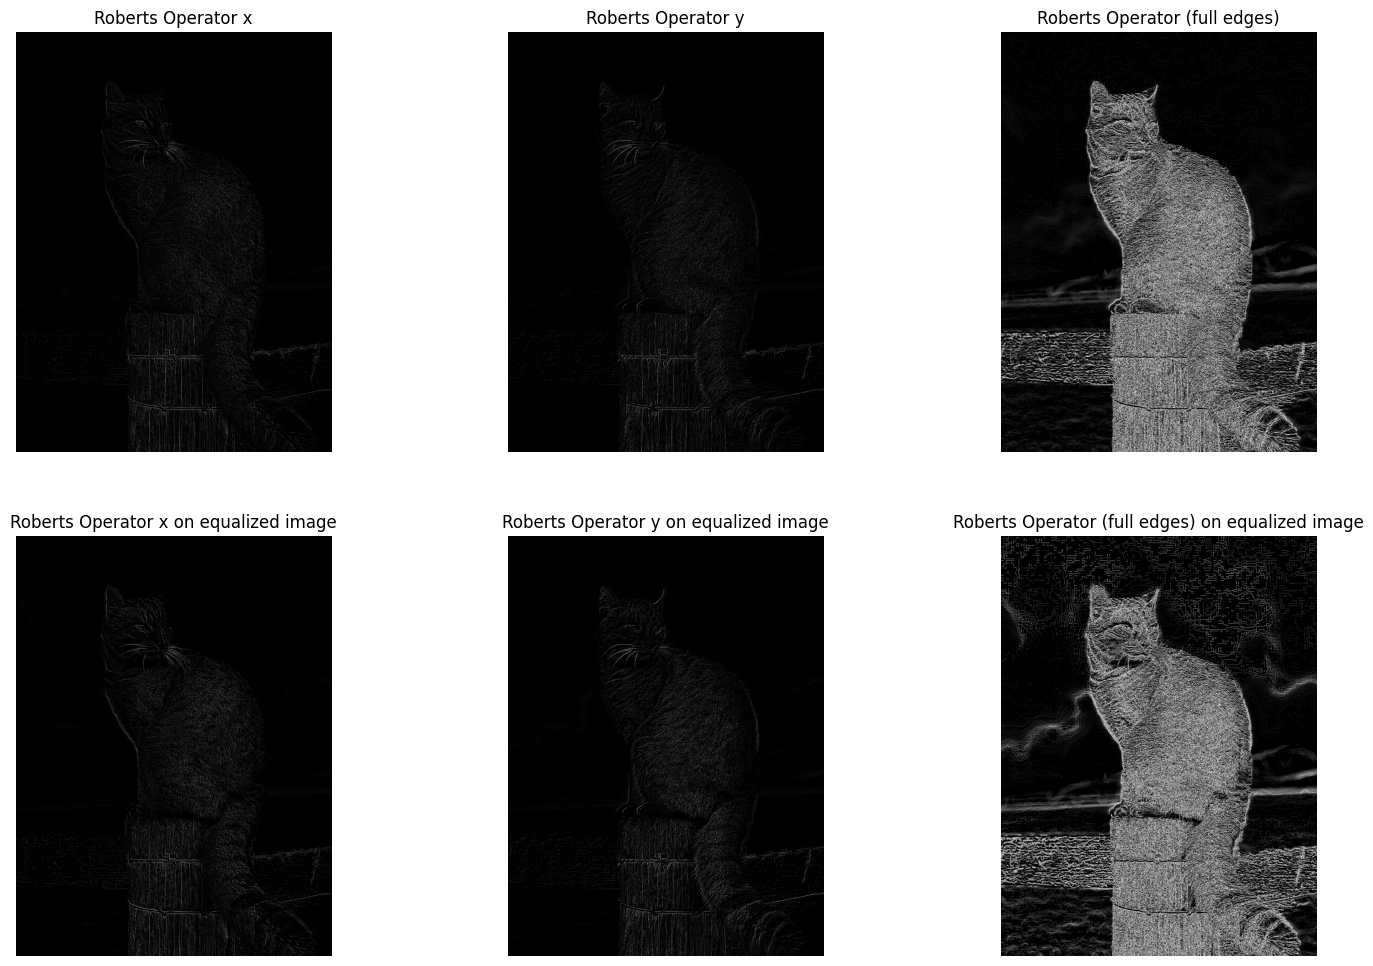

In [ ]:


roberts1 = apply_filter(img_gray, filters['roberts_x'])
roberts2 = apply_filter(img_gray, filters['roberts_y'])
roberts = np.sqrt(roberts1 ** 2 + roberts2 ** 2)
roberts1_eq = apply_filter(equalized_img_cv_gray, filters['roberts_x'])
roberts2_eq = apply_filter(equalized_img_cv_gray, filters['roberts_y'])
roberts_eq = np.sqrt(roberts1_eq ** 2 + roberts2_eq ** 2)

plot_images([(roberts1, roberts1_eq, ), (roberts2, roberts2_eq), (roberts, roberts_eq)], ['Roberts Operator x', 'Roberts Operator y', 'Roberts Operator (full edges)'])


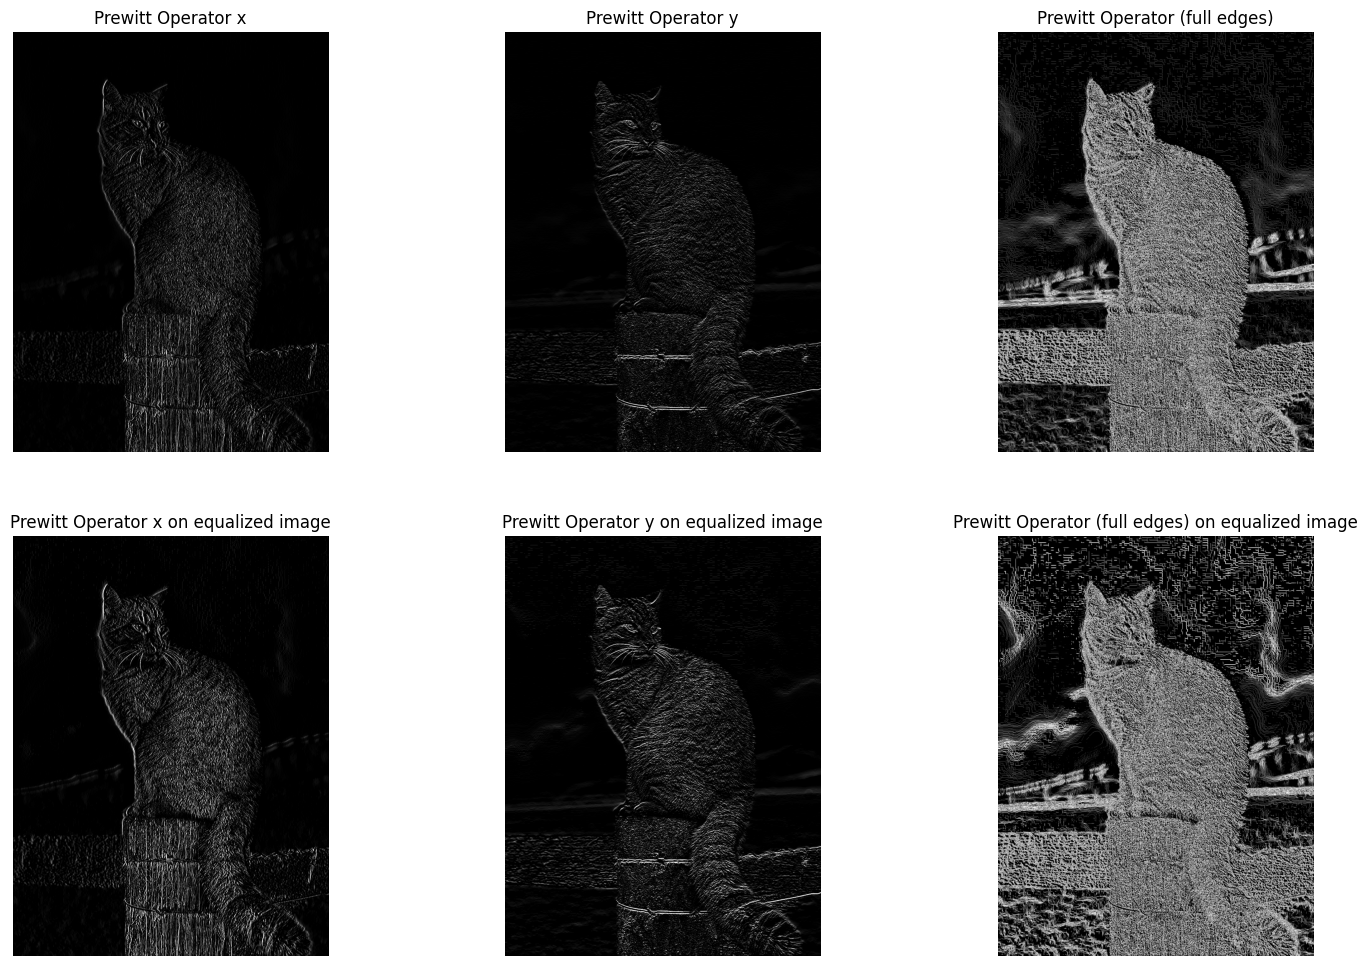

In [ ]:
prewitt1 = apply_filter(img_gray, filters['prewitt_x'])
prewitt2 = apply_filter(img_gray, filters['prewitt_y'])
prewitts = np.sqrt(prewitt1 ** 2 + prewitt2 ** 2)
prewitt1_eq = apply_filter(equalized_img_cv_gray, filters['prewitt_x'])
prewitt2_eq = apply_filter(equalized_img_cv_gray, filters['prewitt_y'])
prewitt_eq = np.sqrt(prewitt1_eq ** 2 + prewitt2_eq ** 2)
plot_images([(prewitt1, prewitt1_eq), (prewitt2, prewitt2_eq), (prewitts,  prewitt_eq)], ['Prewitt Operator x', 'Prewitt Operator y', 'Prewitt Operator (full edges)'])

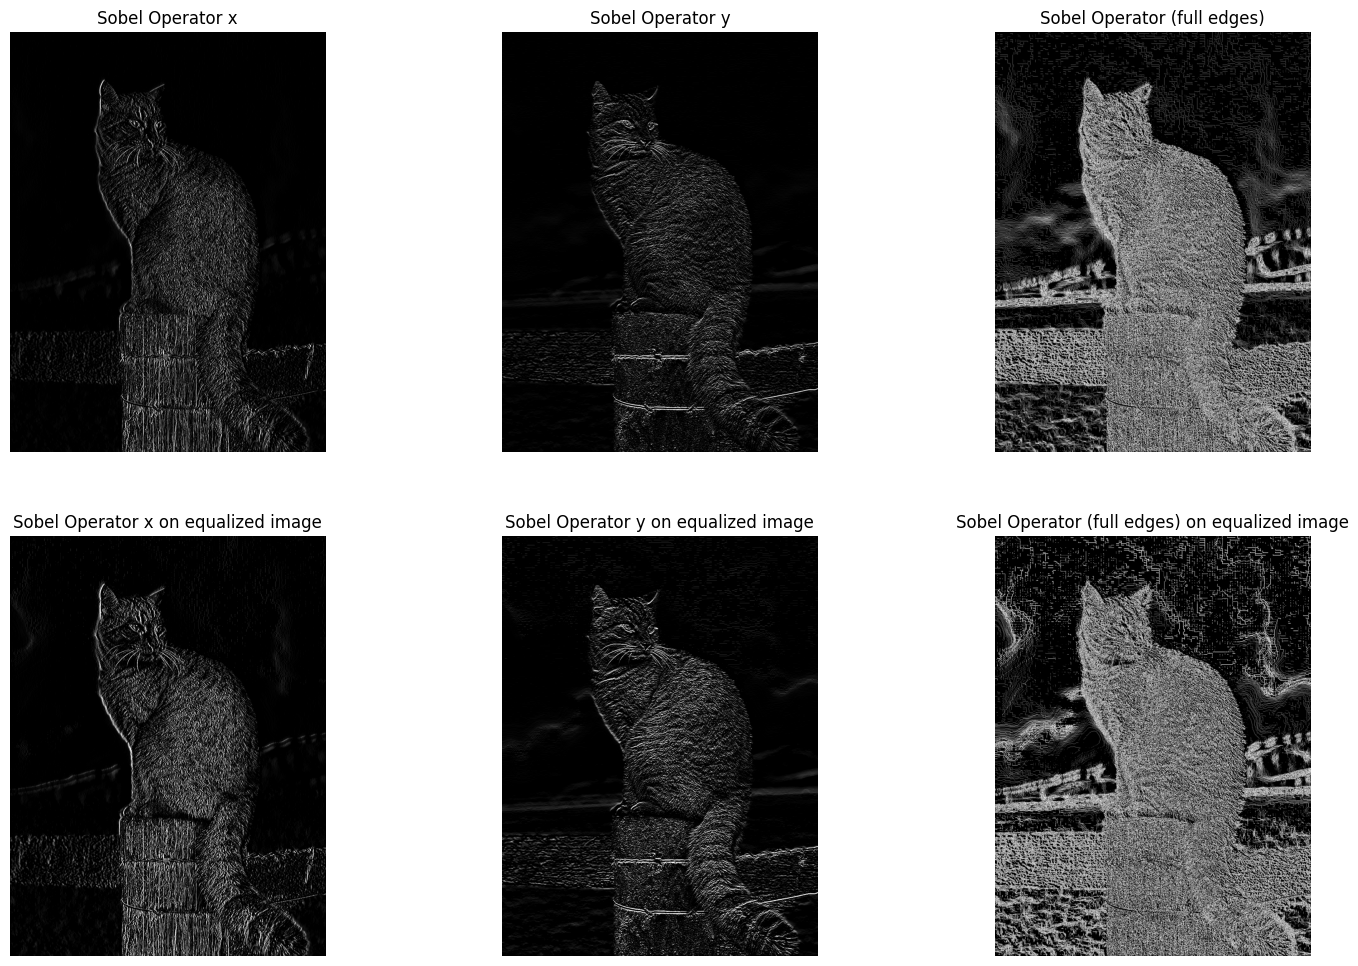

In [ ]:
sobel1 = apply_filter(img_gray, filters['sobel_x'])
sobel2 = apply_filter(img_gray, filters['sobel_y'])
sobel = np.sqrt(sobel1 ** 2 + sobel2 ** 2)
sobel1_eq = apply_filter(equalized_img_cv_gray, filters['sobel_x'])
sobel2_eq = apply_filter(equalized_img_cv_gray, filters['sobel_y'])
sobel_eq = np.sqrt(sobel1_eq ** 2 + sobel2_eq ** 2)

plot_images([(sobel1, sobel1_eq), (sobel2, sobel2_eq), (sobel, sobel_eq)], ['Sobel Operator x', 'Sobel Operator y', 'Sobel Operator (full edges)'])

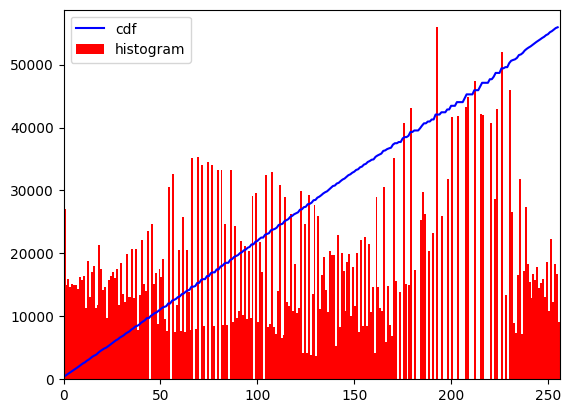

In [ ]:
hist,bins = np.histogram(equalized_img_cv.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(equalized_img_cv.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()